<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri Nov 29 09:29:31 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   37C    P8              1W /   60W |     109MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.4.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

1. **Healthcare** - detecting diseases in medical images (X-rays, MRIs, CT scans).
2. **Automotive** - self-driving cars.
3. **Security** - facial recognition, object detection.


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting in machine learning is when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. **Get more data** - collecting more data can help a model learn the underlying patterns of a dataset rather than the noise.
2. **Use dropout** - a regularization technique where the activations of neurons are randomly set to zero during training to prevent overfitting.
3. **Reduce model complexity** - using a simpler model architecture with fewer parameters can help prevent overfitting.
4. **Use regularization** - adding a penalty term on the size of the model weights can help prevent overfitting.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root='data',
                            train=True,
                            download=True,
                            transform=ToTensor(),
                            target_transform=None)

test_data = datasets.MNIST(root="data",
                           train=False,
                           download=True,
                           transform=ToTensor(),
                           target_transform=None)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
image.shape

torch.Size([1, 28, 28])

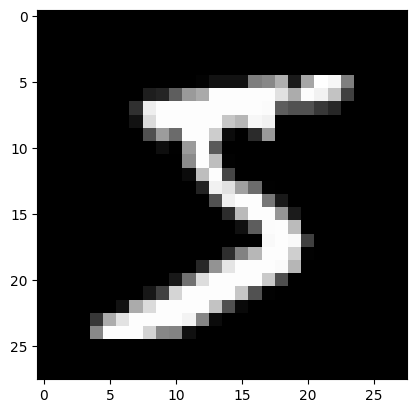

In [7]:
import matplotlib.pyplot as plt

plt.imshow(image.squeeze(), cmap='grey')

In [8]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

## 6. Visualize at least 5 different samples of the MNIST training dataset.

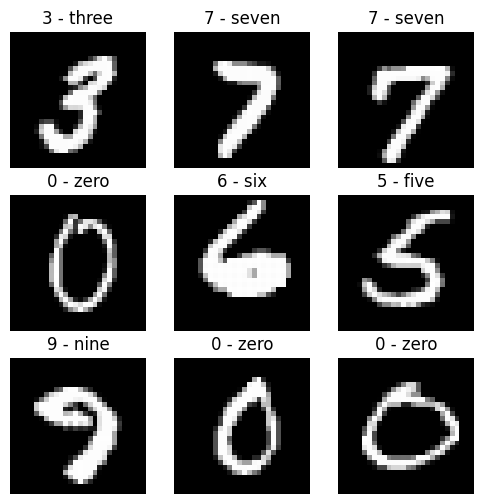

In [10]:
import numpy as np

nrows, ncols = 3, 3
plt.figure(figsize=(6, 6))
for i in range(nrows * ncols):
    random_idx = np.random.randint(0, len(train_data))
    img, label = train_data[random_idx]
    plt.subplot(nrows, ncols, i+1)
    plt.title(class_names[label])
    plt.imshow(img.squeeze(), cmap='grey')
    plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000169D3E78990>, <torch.utils.data.dataloader.DataLoader object at 0x00000169D3EBB850>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [12]:
from torch import nn
# Create a convolutional neural network
class MNISTMODEL_V0(nn.Module):
    """Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [13]:
torch.manual_seed = 42

model_2 = MNISTMODEL_V0(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)

model_2

MNISTMODEL_V0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [14]:
# Pass image through model
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0248,  0.0057, -0.0252,  0.0577,  0.0019,  0.0549, -0.0317,  0.0405,
          0.0536,  0.0491]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
# function to timeout the experience
from timeit import default_timer as timer

def print_total_train_time(start_time: float,
                           end_time: float,
                           device: torch.device = device):
    total_time = end_time - start_time
    print(f"Total train time on {device}: {total_time:.3f} seconds")
    return total_time

In [17]:
from torchmetrics import Accuracy

# Choose loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)
acc_fn = Accuracy(task='multiclass', num_classes=len(class_names))

In [26]:
from tqdm.auto import tqdm

# Training function
def train_step(model: nn.Module,
               data_loader: DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn,
               device: torch.device = device):
    """Performs one step training on model using data_loader"""
    # Training mode
    model.train()
    # Send model to target device
    model.to(device)
    acc_fn.to(device)

    # Initialize loss and accuracy
    train_loss, train_acc = 0, 0

    # Training loop through the data
    for batch, (X, y) in enumerate(data_loader):
        # Send data to target device
        X, y = X.to(device), y.to(device)
        # Change labels data type to float
        # y = y.type(torch.float)
        
        # 1. Forward pass
        y_logits = model(X)
        y_pred = torch.softmax(y_logits, dim=0).argmax(dim=1)

        # 2. Calculate loss and accuracy for this batch
        loss = loss_fn(y_logits, y)
        acc = acc_fn(y_pred, y)
        train_loss += loss
        train_acc += acc

        # 3. Zero optimizer
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    
    # Average loss and accuracy
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    # Print out what's happening
    print(f"Train loss: {train_loss:.4f} | Train acc: {100*train_acc:.2f}%")

In [27]:
# Testing function
def test_step(model: nn.Module,
              data_loader: DataLoader,
              loss_fn: nn.Module,
              acc_fn,
              device: torch.device = device):
    """Performs one step testing using model on data_loader"""
    # turn on evaluation mode
    model.eval()
    # Send model to the target device
    model.to(device)
    acc_fn.to(device)

    # Initialize test loss and accuracy
    test_loss, test_acc = 0, 0
    # turn on inference mode
    with torch.inference_mode():
        # Loop through the data
        for batch, (X, y) in enumerate(data_loader):
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            # Change labels data type
            # y = y.type(torch.float)

            # Forward pass
            test_logits = model(X)
            test_pred = torch.softmax(test_logits, dim=0).argmax(dim=1)
            
            # Calculate loss
            test_loss += loss_fn(test_logits, y)
            test_acc += acc_fn(test_pred, y)
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.4f} | Test acc: {100*test_acc:.2f}%")

In [29]:
torch.manual_seed = 42
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn,
               device: torch.device):
    """Returns a dictionary containing the results fo model predicting on data_loader."""
    # Send model and accuracy function to target device
    model.to(device)
    acc_fn.to(device)
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_logits = model(X)
            y_pred = torch.softmax(y_logits, dim=0).argmax(dim=1)
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_logits, y)
            acc += acc_fn(y_pred, y)
        
        # Scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc.item() * 100
    }

In [28]:
torch.manual_seed = 42

# Measure time
train_time_start_cpu = timer()

# epochs for training
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    # Train step
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               acc_fn=acc_fn,
               device="cpu")
    
    # Test step
    test_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              acc_fn=acc_fn,
              device=device)

train_time_end_cpu = timer()
total_train_time_cpu = print_total_train_time(start_time=train_time_start_cpu,
                                              end_time=train_time_end_cpu,
                                              device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.0742 | Train acc: 85.37%


 33%|███▎      | 1/3 [01:09<02:18, 69.24s/it]

Test loss: 0.0648 | Test acc: 86.72%
Epoch: 1
----------
Train loss: 0.0566 | Train acc: 86.98%


 67%|██████▋   | 2/3 [02:44<01:24, 84.26s/it]

Test loss: 0.0457 | Test acc: 87.19%
Epoch: 2
----------
Train loss: 0.0488 | Train acc: 87.12%


100%|██████████| 3/3 [03:55<00:00, 78.37s/it]

Test loss: 0.0447 | Test acc: 88.41%
Total train time on cpu: 235.125 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [30]:
# Calculate model 2 results on test dataset
model_0_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    acc_fn=acc_fn,
    device="cpu"
)

model_0_results

100%|██████████| 313/313 [00:03<00:00, 84.13it/s] 


{'model_name': 'MNISTMODEL_V0',
 'model_loss': 0.04911940544843674,
 'model_acc': 91.70327186584473}

In [61]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device):
    
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass
            pred_logit = model(sample).squeeze(dim=0)

            # Get prediction probabilities
            pred_prob = torch.softmax(pred_logit, dim=0)

            # Append to prediction list
            pred_probs.append(pred_prob.cpu())

    # Stack the pre_probs to turn  list into a tensor    
    return torch.stack(pred_probs)


In [70]:
import random
# Make some predictions
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(test_samples[0].shape)
print(test_labels)

torch.Size([1, 28, 28])
[6, 9, 1, 9, 3, 7, 3, 8, 7]


In [71]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device="cpu")
pred_probs[0]

tensor([8.3183e-08, 3.9436e-11, 9.1875e-11, 7.1088e-12, 1.9662e-08, 3.7171e-09,
        1.0000e+00, 3.0540e-13, 5.1436e-08, 1.2534e-11])

In [72]:
pred_classes = torch.argmax(pred_probs, dim=1)
pred_classes

tensor([6, 9, 1, 9, 3, 7, 3, 8, 7])

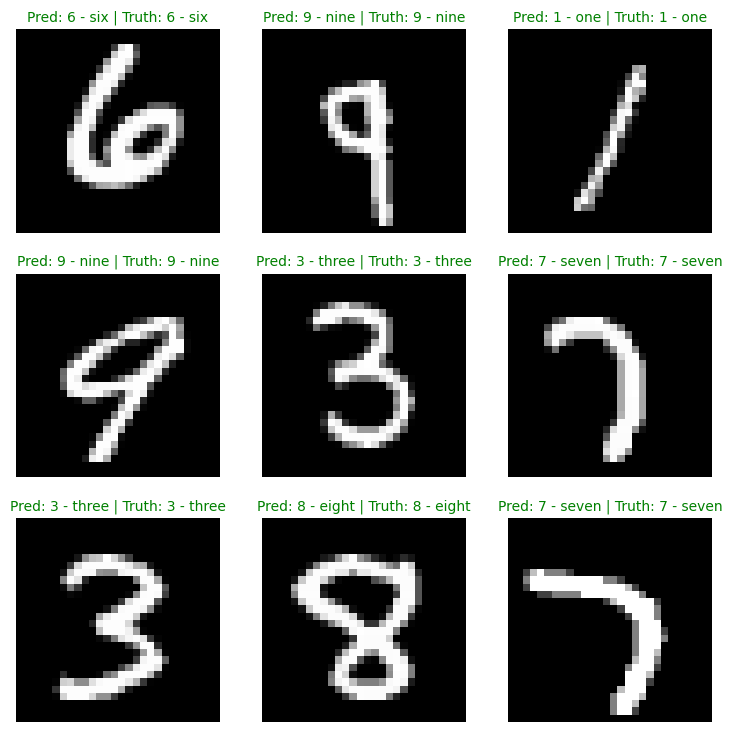

In [73]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the image
    plt.imshow(sample.squeeze(), cmap='grey')

    # Find the prediction label
    pred_label = class_names[pred_classes[i]]

    # Find the truth label
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')

    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [77]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
model_2.to(device)
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data to target device
        X, y = X.to(device), y.to(device)
        # Do forward pas
        y_logits = model_2(X).squeeze(dim=1)
        # Turn from logits -> probs -> labels
        y_pred = torch.softmax(y_logits, dim=0).argmax(dim=1)
        # Put predictions on CPU
        y_preds.append(y_pred.cpu())

# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making predictions...: 100%|██████████| 313/313 [00:02<00:00, 118.30it/s]


tensor([7, 2, 1,  ..., 4, 5, 6])

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass',
                          num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

In [80]:
confmat_tensor

tensor([[ 922,    3,    4,    0,    2,    2,   25,    5,    8,    9],
        [   0, 1130,    0,    0,    2,    0,    3,    0,    0,    0],
        [  15,   67,  898,   10,    5,    0,    4,   17,   15,    1],
        [   6,   15,    8,  889,    1,   46,    1,   19,   12,   13],
        [   5,   15,    0,    0,  908,    3,    4,    9,    4,   34],
        [   3,    3,    2,   22,    1,  743,   27,    8,   23,   60],
        [   9,   10,    0,    0,   12,   16,  900,    0,   10,    1],
        [   1,   41,   19,    8,    6,    1,    0,  920,    1,   31],
        [   9,    9,    7,    7,    3,    8,   11,    1,  904,   15],
        [   3,    8,    1,    3,   19,    3,    2,   12,    3,  955]])

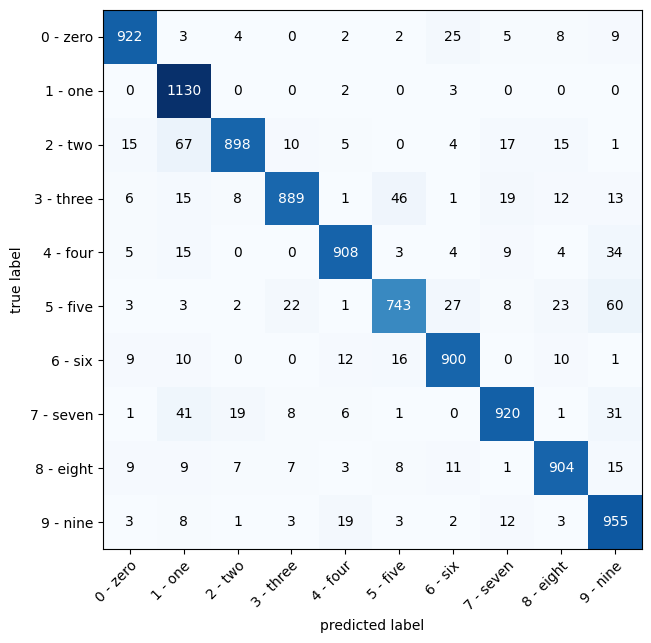

In [83]:
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(12, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?